In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os
from pdf2image import convert_from_path
import tempfile

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import svm

import segment_boards

%matplotlib inline
def sbw(im):
  plt.imshow(im, cmap='gray', vmin=0, vmax=255)

def sw(im):
  plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB))
  plt.show()

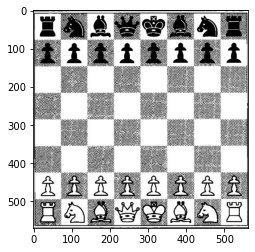

Wall time: 265 ms


In [2]:
%%time
image_path = '..\\data\\out\\a22.png'
board_im = cv2.imread(image_path, 0)

sw(board_im)

In [ ]:
image_path = '..\\data\\dev\\1n.png'
im = cv2.imread(image_path, 0)

In [71]:
X_train.max()

0.784267246723175

In [68]:
board = boards[1]
ymin, ymax, xmin, xmax, w, h = board
board_im = im[ymin:ymax, xmin:xmax]
board_im = cv2.resize(board_im, (128*8, 128*8))

dim = 128
# dim = min(h, w) // 8
# ic_low = dim // 4
# ic_high = dim // 4 * 3

winSize = (128, 128) #
# winSize = (96, 96) #
# blockSize = (64, 64) #
# blockStride = (32, 32) #
# cellSize = (16, 16) #

blockSize = (16, 16) #
blockStride = (8, 8) #
cellSize = (8, 8) #
nbins = 9 #
derivAperture = 1
winSigma = -1.
histogramNormType = 0
L2HysThreshold = 0.2
gammaCorrection = 1
nlevels = 64
signedGradients = True #
hog = cv2.HOGDescriptor(
  winSize, blockSize, blockStride, cellSize, nbins, derivAperture, winSigma, histogramNormType,
  L2HysThreshold, gammaCorrection, nlevels, signedGradients
)

for i in range(8):
  for j in range(8):
    cell = board_im[dim*i: dim*(i+1), dim*j: dim*(j+1)]
#     sw(cell)
    x = hog.compute(cell)
    name = piecenames[int(linear.predict(x.T))]
    cv2.imwrite('..//data//dev//pieces//des32//' + name + '_' + str(i) + '_' + str(j) + ' 2.png', cell)
    
#     cell = im[dim*i + ymin: dim*(i+1) + ymin, dim*j + xmin: dim*(j+1) + xmin]
#     color = 'white_' if (i + j) % 2 == 0 else 'black_'
#     ret,th = cv2.threshold(cell, 225, 255, cv2.THRESH_BINARY)
    
    # inner square majority to determine piece color
#     inner_cell = th[ic_low:ic_high, ic_low:ic_high]
#     cv2.putText(board_im, color + str(inner_cell.sum()), (dim*i,dim*j), cv2.FONT_HERSHEY_SIMPLEX, 1, 255)
#     if color == 'white_':
#       continue
#     cv2.imwrite('..//data//dev//pieces//n_' +color + str(i) + '_' + str(j) + '.png', th)
#     cv2.imwrite('..//data//dev//pieces//n_' +color + str(inner_cell.sum() / inner_cell.size / 255.0) + 'inner.png', inner_cell)
# sw(board_im)


NameError: name 'piecenames' is not defined

In [354]:
im = cv2.imread(image_path, 0)


In [391]:
path = '..\\data\\dev\\work\\*.jpg'
dpath = '..\\data\\dev\\work\\'
import glob, os
for i, f in enumerate(glob.glob(path)):
  n = '%05d' % (i,)
  os.rename(f, os.path.join(dpath, 'WhiteSpace-' + n + '.jpg'))

In [490]:
folder = '..\\data\\dev\\set'
num_images = 8168
des = np.empty((num_images, 5184))
label = np.empty((num_images, 1))
x = 0
for i, piece in enumerate(sorted(os.listdir(folder))):
  folder2 = os.path.join(folder, piece)
  if os.path.isfile(folder2):
    continue
  for j, filename in enumerate(sorted(os.listdir(folder2))):
    fullname = os.path.join(folder2, filename)
    
#     im = cv2.imread(fullname, 0)
#     winSize = (128, 128) #
#     # winSize = (96, 96) #
#     blockSize = (64, 64) #
#     blockStride = (32, 32) #
#     cellSize = (16, 16) #
#     nbins = 9 #
#     derivAperture = 1
#     winSigma = -1.
#     histogramNormType = 0
#     L2HysThreshold = 0.2
#     gammaCorrection = 1
#     nlevels = 64
#     signedGradients = False #
#     hog = cv2.HOGDescriptor(
#       winSize, blockSize, blockStride, cellSize, nbins, derivAperture, winSigma, histogramNormType,
#       L2HysThreshold, gammaCorrection, nlevels, signedGradients
#     )
#     des[x, :] = hog.compute(im, padding=(3,3)).flatten()
    label[x] = i
    x += 1
print(x)

8168


In [69]:
# folder = '..\\data\\dev\\set'
# piecenames = []
# for i, piece in enumerate(sorted(os.listdir(folder))):
#   folder2 = os.path.join(folder, piece)
#   if os.path.isfile(folder2):
#     continue
#   piecenames.append(piece)
# print(piecenames)
piecenames = ['BlackBishop', 'BlackKing', 'BlackKnight', 'BlackPawn', 'BlackQueen', 'BlackRook', 'BlackSpace', 'WhiteBishop', 'WhiteKing', 'WhiteKnight', 'WhitePawn', 'WhiteQueen', 'WhiteRook', 'WhiteSpace']

In [64]:
# fullname = '..\\data\\dev\\set\\BlackKing\\Black-002-36-Average-3.jpg'
# fullname = '..\\data\\dev\\set\\WhiteBishop\\Black-002-9-Average-3.jpg'
fullname = '..\\data\\dev\\pieces\\des32\\BlackPawn_4_2 2.png'
fullname = '..\\data\\out\\23_final\\WhitePawn\\21_WhitePawn_00030_00003_00004_00002.png'


im = cv2.imread(fullname, 0)
sz = 128
im = cv2.resize(im, (sz, sz))
winSize = (128, 128) #
# winSize = (96, 96) #
blockSize = (64, 64) #
blockStride = (32, 32) #
cellSize = (16, 16) #
nbins = 9 #
derivAperture = 1
winSigma = -1.
histogramNormType = 0
L2HysThreshold = 0.2
gammaCorrection = 1
nlevels = 64
signedGradients = False #
hog = cv2.HOGDescriptor(
  winSize, blockSize, blockStride, cellSize, nbins, derivAperture, winSigma, histogramNormType,
  L2HysThreshold, gammaCorrection, nlevels, signedGradients
)

In [7]:
hog.compute(im, padding=(3,3)).shape
# hog.compute(im[0:96,0:96])

(5184, 1)

In [65]:
x = hog.compute(im)
# x = hog.compute(im, padding=(3,3))
print(x.shape, im.shape)

(1296, 1) (128, 128)


In [66]:
piecenames[int(linear.predict(x.T))]

'WhitePawn'

In [2]:
folder = '..\\data\\dev\\pieces\\black'
for i, filename in enumerate(sorted(os.listdir(folder))):
  fullname = os.path.join(folder, filename)
  print(fullname)
  im = cv2.imread(fullname, 0)
  sz = 125
  im = cv2.resize(im, (sz, sz))
  winSize = (128, 128) #
  # winSize = (96, 96) #
  blockSize = (64, 64) #
  blockStride = (32, 32) #
  cellSize = (16, 16) #
  nbins = 9 #
  derivAperture = 1
  winSigma = -1.
  histogramNormType = 0
  L2HysThreshold = 0.2
  gammaCorrection = 1
  nlevels = 64
  signedGradients = False #
  hog = cv2.HOGDescriptor(
    winSize, blockSize, blockStride, cellSize, nbins, derivAperture, winSigma, histogramNormType,
    L2HysThreshold, gammaCorrection, nlevels, signedGradients
  )
  x = hog.compute(im, padding=(3,3))
  y = int(poly.predict(x.T))
  print(y)
  piecename = piecenames[y]
  os.rename(fullname, os.path.join(folder + '3', piecename + str(i) + '.png'))

FileNotFoundError: [WinError 3] The system cannot find the path specified: '..\\data\\dev\\pieces\\black'

In [2]:
piecenames = ['BlackBishop', 'BlackKing', 'BlackKnight', 'BlackPawn', 'BlackQueen', 'BlackRook', 'BlackSpace', 'WhiteBishop', 'WhiteKing', 'WhiteKnight', 'WhitePawn', 'WhiteQueen', 'WhiteRook', 'WhiteSpace']
import pickle
linear = pickle.load(open('..\\data\\dev\\set\\linear_des6.pkl', 'rb'))

folder = '..\\data\\out\\yasser'
outfolder = '..\\data\\out\\yasser'
winSize = (128, 128) #
# winSize = (96, 96) #
blockSize = (64, 64) #
blockStride = (32, 32) #
cellSize = (16, 16) #
# blockSize = (16, 16) #
# blockStride = (8, 8) #
# cellSize = (8, 8) #
nbins = 9 #
derivAperture = 1
winSigma = -1.
histogramNormType = 0
L2HysThreshold = 0.2
gammaCorrection = 1
nlevels = 64
signedGradients = True #
hog = cv2.HOGDescriptor(
  winSize, blockSize, blockStride, cellSize, nbins, derivAperture, winSigma, histogramNormType,
  L2HysThreshold, gammaCorrection, nlevels, signedGradients
)
        
for l, filename in enumerate(sorted(os.listdir(folder))):
  if l % 10 == 0:
    print(l)
  image_path = os.path.join(folder, filename)
  if not os.path.isfile(image_path):
    continue
  im = cv2.imread(image_path, 0)
  boards = segment_boards.segment_boards(im)
  for k, board in enumerate(boards):
    ymin, ymax, xmin, xmax, _, _ = board
    board_im = im[ymin:ymax, xmin:xmax]
    dim = 128
    board_im = cv2.resize(board_im, (dim * 8, dim * 8))
    for i in range(8):
      for j in range(8):
        cell = board_im[dim*i: dim*(i+1), dim*j: dim*(j+1)]
        x = hog.compute(cell)
        y = int(linear.predict(x.T))
        piecename = piecenames[y]
        cv2.imwrite(os.path.join(outfolder, piecename, piecename + ('_%05d_%05d_%05d_%05d' % (l, k, i, j)) + '.png'), cell)
  

0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240


In [61]:
len(piecenames)

0

In [35]:
np.save('..\data\dev\set\X_test.npy', X_test)

In [34]:
np.save('..\data\dev\set\y_test.npy', y_test)

In [32]:
X_test = np.load('..\data\dev\set\X_test.npy')

In [33]:
y_test = np.load('..\data\dev\set\y_test.npy')

In [10]:
X = des
y = label.flatten()
print(X.shape)

(14, 11664)


In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state = 0)

In [31]:
X_train = des
y_train = label.flatten()
print(X_train.shape)

(28, 11664)


In [16]:
X_test = des
y_test = label.flatten()
print(X_test.shape)

(28032, 11664)


In [28]:
%%time
linear = svm.SVC(kernel='linear', C=1, decision_function_shape='ovo').fit(X_train, y_train)
print('linear')

linear
Wall time: 74.1 ms


In [123]:
%%time
rbf = svm.SVC(kernel='rbf', gamma=1, C=1, decision_function_shape='ovo').fit(X_train, y_train)
print('rbf')

rbf
Wall time: 5min 18s


In [124]:
%%time
poly = svm.SVC(kernel='poly', degree=3, C=1, decision_function_shape='ovo').fit(X_train, y_train)
print('poly')

poly
Wall time: 54.1 s


In [10]:
%%time
sig = svm.SVC(kernel='sigmoid', C=1, decision_function_shape='ovo').fit(X_train, y_train)
print('sig')

sig
Wall time: 3min 32s


In [29]:
%%time
linear_pred = linear.predict(X_test)

Wall time: 34.1 s


In [128]:
%%time
poly_pred = poly.predict(X_test)

Wall time: 16.7 s


In [127]:
%%time
rbf_pred = rbf.predict(X_test)

Wall time: 38.1 s


In [33]:
%%time
sig_pred = sig.predict(X_test)  

Wall time: 53.3 s


In [64]:
# accuracy_lin = linear.score(X_test, y_test)
# print("Accuracy Linear Kernel:", accuracy_lin)
# cm_lin = confusion_matrix(y_test, linear_pred)
total = np.sum(cm_lin)
print('     0    1    2    3    4    5    6    7    8    9   10   11   12   13')
print(cm_lin)
print('accuracy', np.trace(cm_lin) / total)
print('total', np.trace(cm_lin), total)
print(cm_lin.diagonal() / cm_lin.sum(1))

     0    1    2    3    4    5    6    7    8    9   10   11   12   13
[[   0    0    0  721    0    0    0    0    0    0    0    0    0    0]
 [   0    0  438    0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0  565    0    0]
 [   0    0    0    0 1400    0    0    0 1283    0    0    0    0  101]
 [   0    0  435    0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0  836    0    0    0]
 [   0 8283    0    0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0  692    0    0    0    0    0    0    0    0    0    0]
 [   0    0  438    0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0  576    0    0]
 [   0    0    0    0    0    0 2027    0    2    0    0    0    0  716]
 [   0    0  431    0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0 

In [129]:
acc = poly.score(X_test, y_test)
print(acc)
cm_lin = confusion_matrix(y_test, poly_pred)
print(cm_lin)

1.0
[[ 413    0    0    0    0    0    0    0    0    0    0    0    0    0]
 [   0  267    0    0    0    0    0    0    0    0    0    0    0    0]
 [   0    0  328    0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0 1651    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0  252    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0  504    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0 4962    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0  442    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0  290    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0  365    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0 1649    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0  266    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0    0  531    0]
 [   0    0    0    0    0    0    0    0    0 

In [130]:
acc = rbf.score(X_test, y_test)
print(acc)
cm_lin = confusion_matrix(y_test, rbf_pred)
print(cm_lin)

1.0
[[ 413    0    0    0    0    0    0    0    0    0    0    0    0    0]
 [   0  267    0    0    0    0    0    0    0    0    0    0    0    0]
 [   0    0  328    0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0 1651    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0  252    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0  504    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0 4962    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0  442    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0  290    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0  365    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0 1649    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0  266    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0    0  531    0]
 [   0    0    0    0    0    0    0    0    0 

In [35]:
%%time
from sklearn.neighbors import NearestNeighbors
nbrs = NearestNeighbors(n_neighbors=1, algorithm='ball_tree').fit(X_train)
distances, indices = nbrs.kneighbors(X_test)

Wall time: 33.1 s


In [25]:
import pickle
pickle.dump(linear, open('..\\data\\dev\\set\\linear_des8.pkl', 'wb'))

In [29]:
import pickle
pickle.dump(linear, open('..\\data\\dev\\set\\linear.pkl', 'wb'))
pickle.dump(poly, open('..\\data\\dev\\set\\poly.pkl', 'wb'))
pickle.dump(rbf, open('..\\data\\dev\\set\\rbf.pkl', 'wb'))
pickle.dump(sig, open('..\\data\\dev\\set\\sig.pkl', 'wb'))

In [66]:
import pickle
linear = pickle.load(open('..\\data\\dev\\set\\linear_des6.pkl', 'rb'))

In [30]:
folder = '..\\data\\out\\23_templates'
# num_images = 28032 * 1
num_images = 14 * 2
# des = np.empty((num_images, 8100))
# des = np.empty((num_images, 1296))
des = np.empty((num_images, 5184))
des = np.empty((num_images, 11664))


label = np.empty((num_images, 1))
x = 0
for i, piece in enumerate(sorted(os.listdir(folder))):
  folder2 = os.path.join(folder, piece)
  if os.path.isfile(folder2):
    continue
  for j, filename in enumerate(sorted(os.listdir(folder2))):
    fullname = os.path.join(folder2, filename)
    
    im = cv2.imread(fullname, 0)
    im = cv2.resize(im, (128, 128))
    winSize = (128, 128) #
    # winSize = (96, 96) #
    blockSize = (64, 64) #
    blockStride = (32, 32) #
    cellSize = (16, 16) #
    
#     blockSize = (16, 16) #
#     blockStride = (8, 8) #
#     cellSize = (8, 8) #
    nbins = 9 #
    derivAperture = 1
    winSigma = -1.
    histogramNormType = 0
    L2HysThreshold = 0.2
    gammaCorrection = 1
    nlevels = 64
    signedGradients = True #
    hog = cv2.HOGDescriptor(
      winSize, blockSize, blockStride, cellSize, nbins, derivAperture, winSigma, histogramNormType,
      L2HysThreshold, gammaCorrection, nlevels, signedGradients
    )
    des[x, :] = hog.compute(im, padding=(3,3)).flatten()
#     des[x, :] = hog.compute(im).flatten()

    label[x] = i
    x += 1
    
#     blur = cv2.GaussianBlur(im,(5,5),0)
#     des[x, :] = hog.compute(blur, padding=(3,3)).flatten()
# #     des[x, :] = hog.compute(blur).flatten()
#     label[x] = i
#     x += 1
    
#     median = cv2.medianBlur(im,5)
#     des[x, :] = hog.compute(median, padding=(3,3)).flatten()
# #     des[x, :] = hog.compute(median).flatten()                        
#     label[x] = i
#     x += 1
    
    if x % 1000 == 0:
      print(i, j)

In [29]:
sift = cv2.xfeatures2d.SIFT_create()
kp, ds = sift.detectAndCompute(im,None)
# print(len(kp))
# print(kp[0].pt)
print(ds.shape)

(4, 128)


In [55]:
%%time
# criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, int(1e6), 1.0)
criteria = (cv2.TERM_CRITERIA_MAX_ITER, int(1e6), 0)
ret, bestLabels, centers = cv2.kmeans(np.float32(X_test), 28, None, criteria, 10, cv2.KMEANS_PP_CENTERS)

Wall time: 2min 55s


In [61]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=14, random_state=0, max_iter=int(1e6)).fit(X_test)

In [63]:
# cm_lin = confusion_matrix(y_test, bestLabels, labels=np.arange(28))
cm_lin = confusion_matrix(y_test, kmeans.labels_, labels=np.arange(14))
# cm_lin = confusion_matrix(y_test, np.floor(indices / 2), labels=np.arange(14))
# bestLabels.min()
